# Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
%%time
df = pd.read_csv('../data/redcard/crowdstorm_disaggregated.csv.gz', compression='gzip')

CPU times: user 2.61 s, sys: 146 ms, total: 2.76 s
Wall time: 2.76 s


## Data Structure

> The dataset is available as a list with 146,028 dyads of players and referees and includes details from players, details from referees and details regarding the interactions of player-referees. A summary of the variables of interest can be seen below. A detailed description of all variables included can be seen in the README file on the project website. -- https://docs.google.com/document/d/1uCF5wmbcL90qvrk_J27fWAvDcDNrO9o_APkicwRkOKc/edit

| Variable Name: | Variable Description: | 
| -- | -- | 
| playerShort | short player ID | 
| player | player name | 
| club | player club | 
| leagueCountry | country of player club (England, Germany, France, and Spain) | 
| height | player height (in cm) | 
| weight | player weight (in kg) | 
| position | player position | 
| games | number of games in the player-referee dyad | 
| goals | number of goals in the player-referee dyad | 
| yellowCards | number of yellow cards player received from the referee | 
| yellowReds | number of yellow-red cards player received from the referee | 
| redCards | number of red cards player received from the referee | 
| photoID | ID of player photo (if available) | 
| rater1 | skin rating of photo by rater 1 | 
| rater2 | skin rating of photo by rater 2 | 
| refNum | unique referee ID number (referee name removed for anonymizing purposes) | 
| refCountry | unique referee country ID number | 
| meanIAT | mean implicit bias score (using the race IAT) for referee countr

In [4]:
# how many records are there?
df.shape

(426572, 32)

In [5]:
# what do the entries in the table look like?
df.sample(100)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone,allreds,allredsStrict,refCount
298437,andreas-ottl,Andreas Ottl,FC Augsburg,Germany,01.03.1985,185.0,77.0,Defensive Midfielder,3,1,...,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.000,0,0,65
52952,yohann-poulard,Yohann Poulard,AC Ajaccio,France,01.07.1976,190.0,80.0,NaN,5,2,...,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,NaN,0,0,440
357046,matthew-upson,Matthew Upson,Stoke City,England,18.04.1979,185.0,72.0,Center Back,13,3,...,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,0.125,0,0,325
422330,heiko-westermann,Heiko Westermann,Hamburger SV,Germany,14.08.1983,190.0,87.0,Center Back,23,8,...,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.250,0,0,805
411037,timothee-kolodziejczak,Timothée Kolodziejczak,OGC Nice,France,01.10.1991,181.0,69.0,Left Fullback,3,2,...,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.375,0,0,691
26087,stephen-ireland,Stephen Ireland,Aston Villa,England,22.08.1986,175.0,68.0,Attacking Midfielder,11,5,...,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,0.250,0,0,615
43225,juan-albin,Juan Albín,Espanyol Barcelona,Spain,17.07.1986,179.0,77.0,Left Midfielder,5,3,...,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0.375,0,0,245
270627,marcell-jansen,Marcell Jansen,Hamburger SV,Germany,04.11.1985,191.0,89.0,Left Midfielder,1,0,...,0.340205,5223.0,0.000081,0.626401,5621.0,0.000373,0.000,0,0,331
165823,noah-korczowski,Noah Korczowski,1. FC Nürnberg,Germany,08.01.1994,185.0,80.0,Center Back,1,0,...,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.125,0,0,15
277505,edin-dzeko,Edin Džeko,Manchester City,England,17.03.1986,193.0,84.0,Center Forward,6,5,...,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,0.250,0,0,525


* it looks like there are some entries with NaN's, how prevalent is this issue?
* which columns should I use to answer the question?
 * why are there so many "red card" columns?
 * why are there so many "skintone" columns?

### NaN/null exploration

In [6]:
import missingno as msno

/Users/daniel/miniconda2/envs/pycon-eda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [7]:
(df.isnull().sum(axis=0)/float(len(df))).sort_values()

playerShort      0.000000
allreds          0.000000
refCountry       0.000000
refNum           0.000000
allredsStrict    0.000000
yellowReds       0.000000
yellowCards      0.000000
goals            0.000000
defeats          0.000000
ties             0.000000
redCards         0.000000
games            0.000000
player           0.000000
victories        0.000000
club             0.000000
leagueCountry    0.000000
refCount         0.000000
birthday         0.000000
Alpha_3          0.000002
meanIAT          0.000471
nIAT             0.000471
seIAT            0.000471
meanExp          0.000471
nExp             0.000471
seExp            0.000471
height           0.000837
weight           0.009054
position         0.103607
rater1           0.125430
rater2           0.125430
skintone         0.125430
photoID          0.125430
dtype: float64

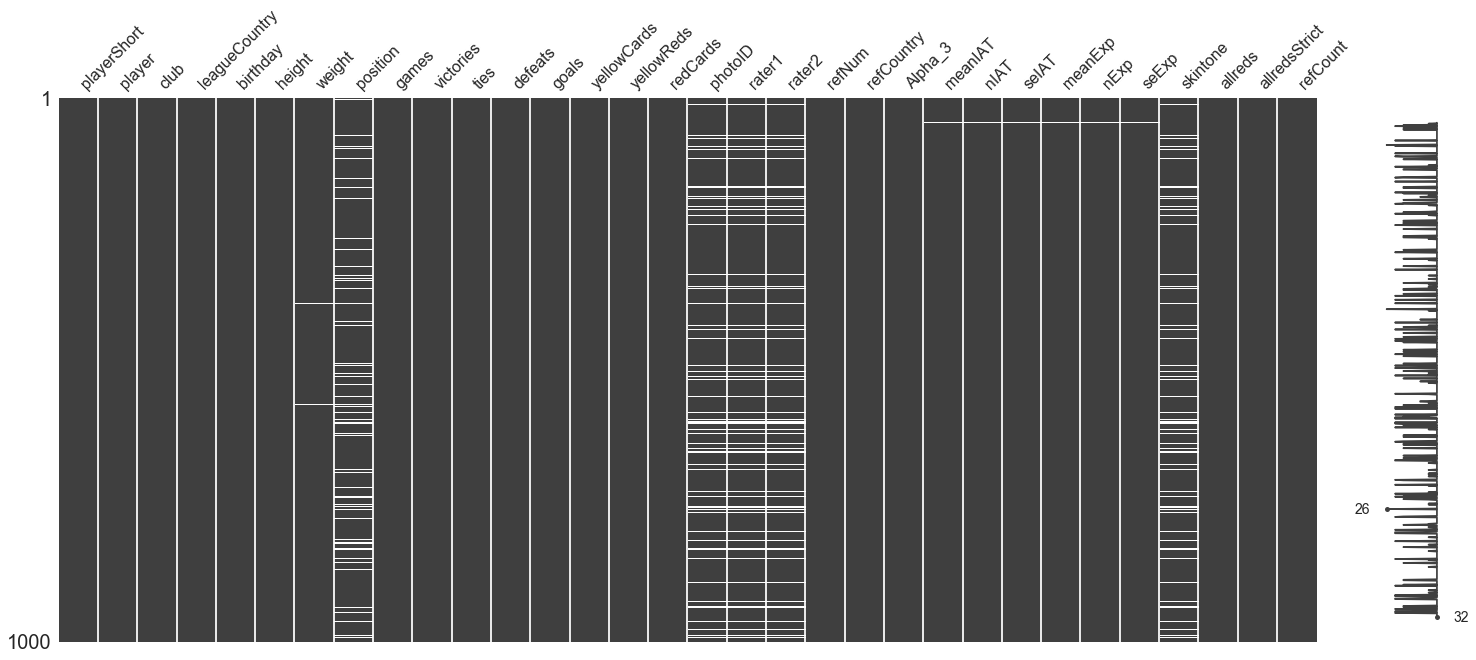

In [8]:
msno.matrix(df.sample(1000))

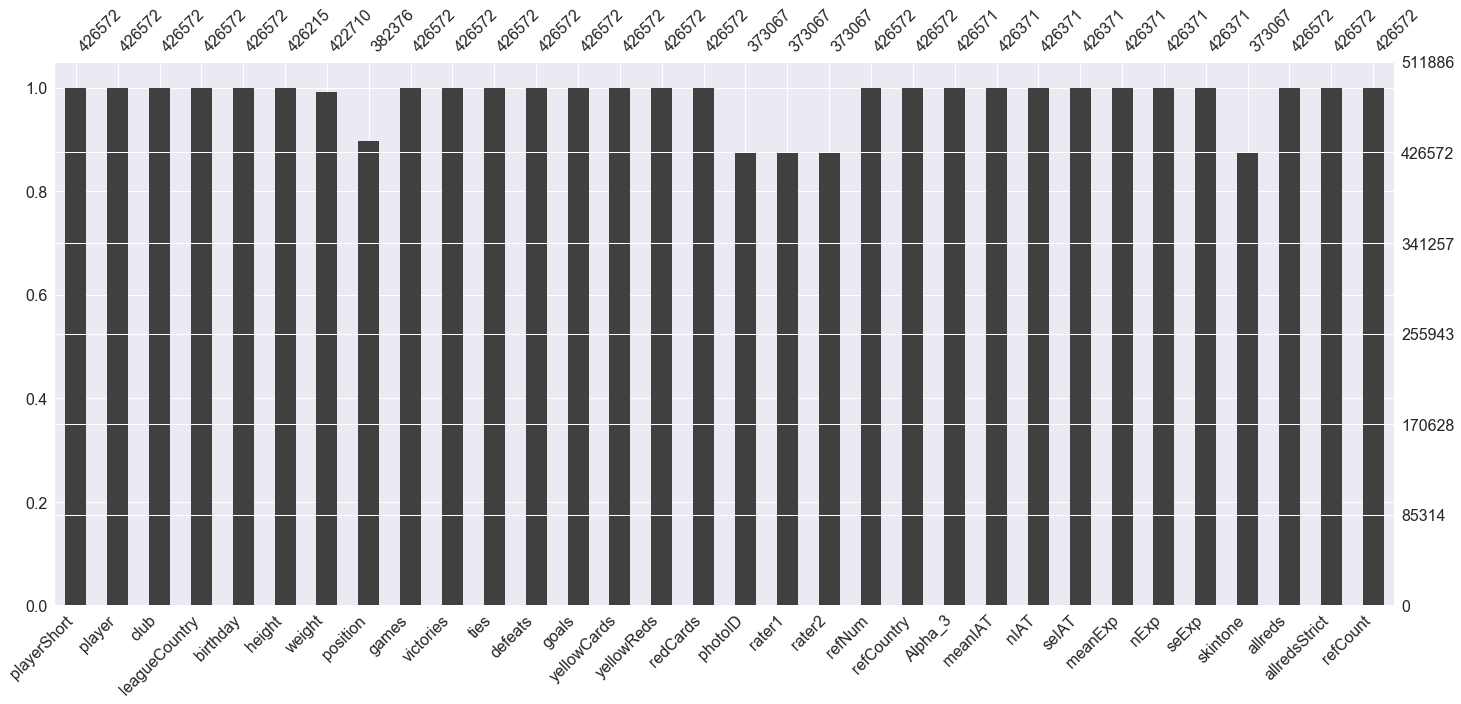

In [9]:
msno.bar(df)

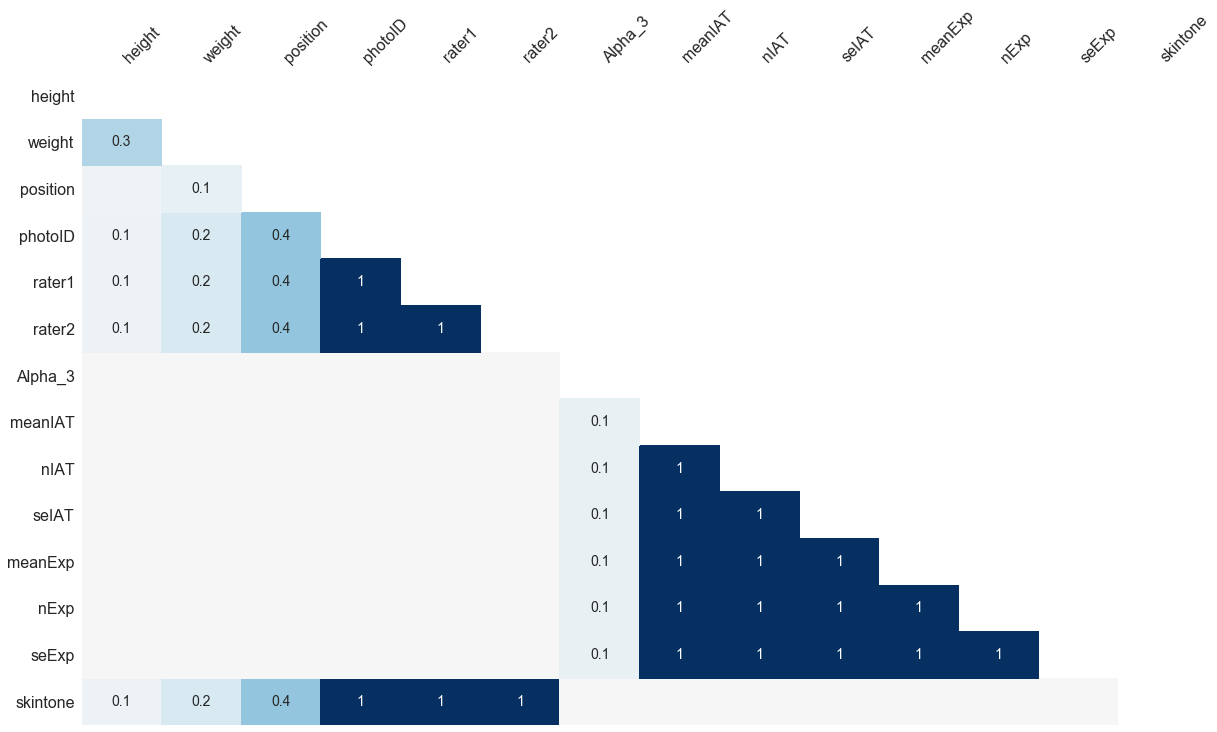

In [10]:
msno.heatmap(df)

the data is mostly there. 

the most frequently missing fields are the **photoID**, **rater1**, **rater2**, and **skintone**. 
they're missing for about 12.5% of the rows and their missing ness is highly correlated.

**position**, **weight**, and **height** are the next most commonly mising fields at a rate of about ~10%, ~1%, and ~0.1%  respectively. moderately correlated

**meanIAT**, **nIAT**, **seIAT**, **meanExp**, **nExp**, **seExp** are all missing at about ~0.05%, highly correlated

assumption for below: ignore rows with missing data

In [11]:
df_nona = df.dropna()

In [12]:
df_nona.shape

(350269, 32)

In [13]:
len(df_nona) / float(len(df))

0.821125155893964

In [14]:
df_nona.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone,allreds,allredsStrict,refCount
count,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,...,350269.000000,3.502690e+05,3.502690e+05,350269.000000,3.502690e+05,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000
mean,181.990031,76.359407,7.403650,3.342631,1.775724,2.285295,0.862254,0.986399,0.027653,0.029457,...,0.345955,1.646730e+04,3.297268e-04,0.439802,1.714364e+04,0.001552,0.278755,0.008271,0.004220,380.185489
std,6.825287,7.135691,6.590277,3.571530,1.941784,2.426909,1.760673,1.409203,0.169052,0.173172,...,0.025013,8.626525e+04,2.866284e-03,0.169293,8.867275e+04,0.012059,0.283965,0.090567,0.064821,229.118702
min,161.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001,0.000000,0.000000,0.000000,1.000000
25%,178.000000,71.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225,0.000000,0.000000,0.000000,180.000000
50%,183.000000,76.000000,5.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.336628,3.219000e+03,1.277387e-04,0.356446,3.351000e+03,0.000575,0.250000,0.000000,0.000000,412.000000
75%,187.000000,81.000000,10.000000,5.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002,0.375000,0.000000,0.000000,531.000000
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,...,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660,1.000000,1.000000,1.000000,842.000000


### focus on "skintone" columns and "red card" columns

In [15]:
df_focus = df_nona[['rater1', 'rater2', 'redCards', 'skintone', 'allreds', 'allredsStrict']]

In [16]:
df_focus.describe()

,rater1,rater2,redCards,skintone,allreds,allredsStrict
count,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000,350269.000000
mean,0.259675,0.297835,0.029457,0.278755,0.008271,0.004220
std,0.292046,0.287384,0.173172,0.283965,0.090567,0.064821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000
75%,0.250000,0.250000,0.000000,0.375000,0.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [17]:
r1_vs_r2 = df_focus.groupby(['rater1', 'rater2']).size().unstack()

In [18]:
r1_vs_r2

rater2,0.0,0.25,0.5,0.75,1.0
rater1,,,,,
0.00,93748.0,46469.0,439.0,NaN,NaN
0.25,5111.0,111571.0,8642.0,NaN,NaN
0.50,NaN,6831.0,23801.0,5637.0,NaN
0.75,NaN,NaN,448.0,19886.0,5783.0
1.00,NaN,NaN,NaN,1555.0,20348.0


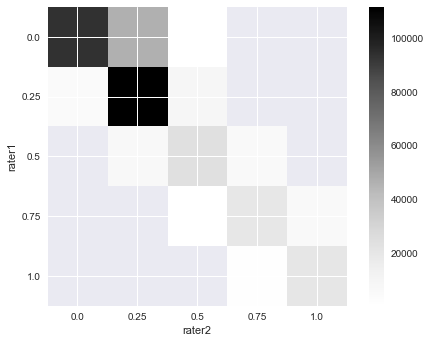

In [19]:
plt.imshow(r1_vs_r2.values)

shape = r1_vs_r2.shape

plt.xticks(np.arange(shape[0]), r1_vs_r2.index.values)
plt.xlabel('rater2')

plt.yticks(np.arange(shape[1]), r1_vs_r2.columns.values)
plt.ylabel('rater1')

plt.colorbar()

In [20]:
def compare_cols(col0, col1):

    data = df_focus.groupby([col0, col1]).size().unstack()
    shape = data.shape
    
    plt.imshow(data.values)

    plt.yticks(np.arange(shape[0]), data.index.values)
    plt.ylabel(col0)
    plt.xticks(np.arange(shape[1]), data.columns.values)
    plt.xlabel(col1)
    
    plt.colorbar()

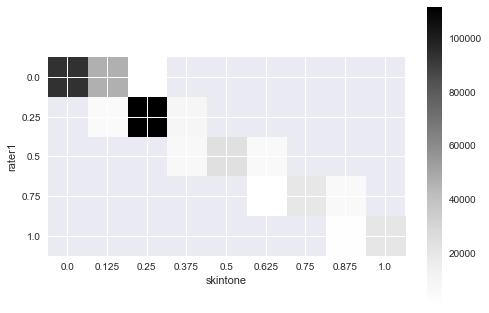

In [21]:
compare_cols('rater1', 'skintone')

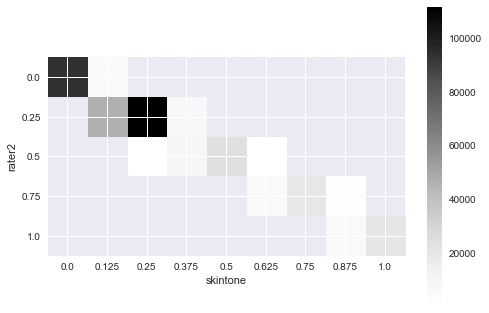

In [22]:
compare_cols('rater2', 'skintone')

**skintone**, **rater1**, **rater2** all seem pretty highly correlated

## explore "red card" counts vs "skin tone" value

In [23]:
aggs = ['count', 'median', 'sum', 'mean', 'var']

In [24]:
df_focus_rater1 = df_focus.groupby(['rater1']).agg(aggs)

(0, 147688.79999999999)

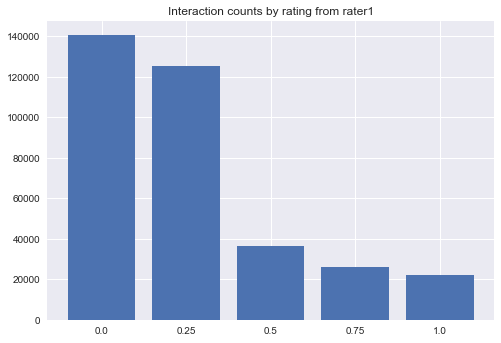

In [25]:
data = df_focus_rater1['redCards']['count']

x = data.index.values
y = data.values

plt.bar(np.arange(len(x)), y)
plt.xticks(np.arange(len(x)), x)
plt.title('Interaction counts by rating from rater1')

plt.ylim(0, None)

In [26]:
error_of_mean = np.sqrt(df_focus_rater1['redCards']['var'].values/df_focus_rater1['redCards']['count'].values)

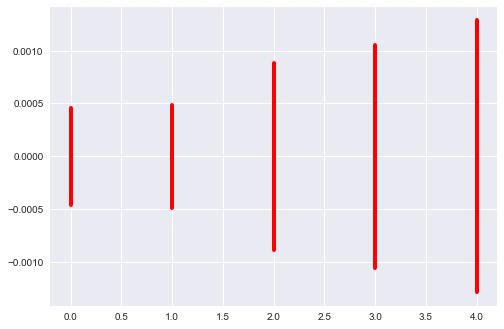

In [27]:
plt.plot([np.arange(len(x)), np.arange(len(x))], [-error_of_mean, +error_of_mean], color='red', lw=4)
plt.show()

In [28]:
def df_col_agg_bar(ax, df, title, col, agg):
    title = '{} {}({})'.format(title, agg, col)
    data = df[col][agg]
    x = data.index.values
    y = data.values
    ax.bar(np.arange(len(x)), y)
    
    if agg == 'mean':
        error_of_mean = np.sqrt(df[col]['var'].values/df[col]['count'].values)
        ax.plot([np.arange(len(x)), np.arange(len(x))],
                [y - error_of_mean, y + error_of_mean], color='red', lw=4)
    
    ax.xaxis.set_ticks(np.arange(len(x)))
    ax.xaxis.set_ticklabels(x)
    ax.set_title(title)
    ax.set_ylim(0, None)

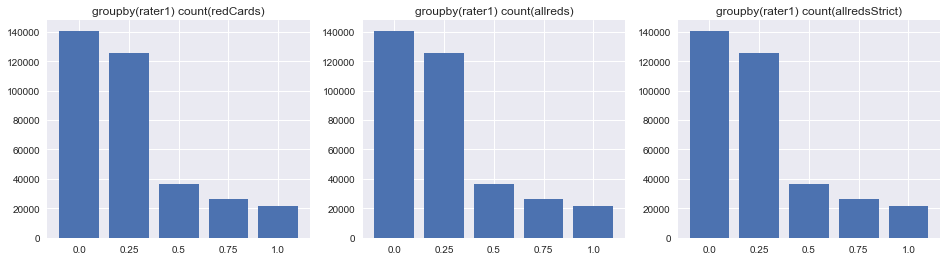

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

data = df_focus.groupby(['rater1']).agg(aggs)

df_col_agg_bar(axes[0], data, 'groupby(rater1)', 'redCards', 'count')
df_col_agg_bar(axes[1], data, 'groupby(rater1)', 'allreds', 'count')
df_col_agg_bar(axes[2], data, 'groupby(rater1)', 'allredsStrict', 'count')

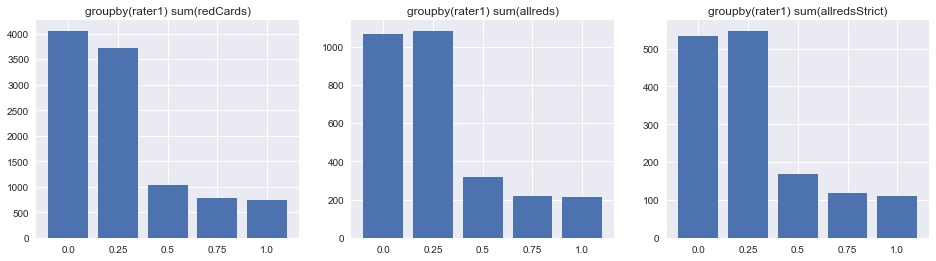

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

data = df_focus.groupby(['rater1']).agg(aggs)

df_col_agg_bar(axes[0], data, 'groupby(rater1)', 'redCards', 'sum')
df_col_agg_bar(axes[1], data, 'groupby(rater1)', 'allreds', 'sum')
df_col_agg_bar(axes[2], data, 'groupby(rater1)', 'allredsStrict', 'sum')

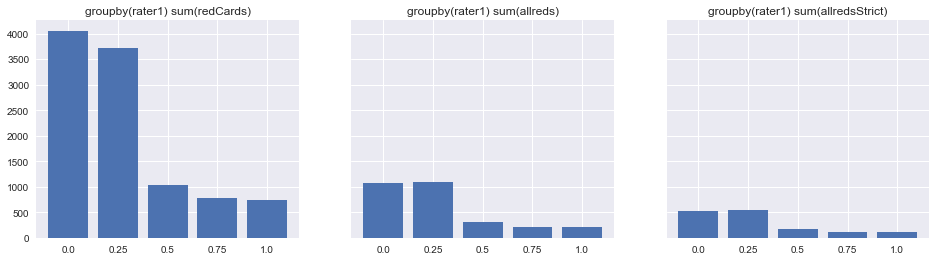

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

data = df_focus.groupby(['rater1']).agg(aggs)

df_col_agg_bar(axes[0], data, 'groupby(rater1)', 'redCards', 'sum')
df_col_agg_bar(axes[1], data, 'groupby(rater1)', 'allreds', 'sum')
df_col_agg_bar(axes[2], data, 'groupby(rater1)', 'allredsStrict', 'sum')

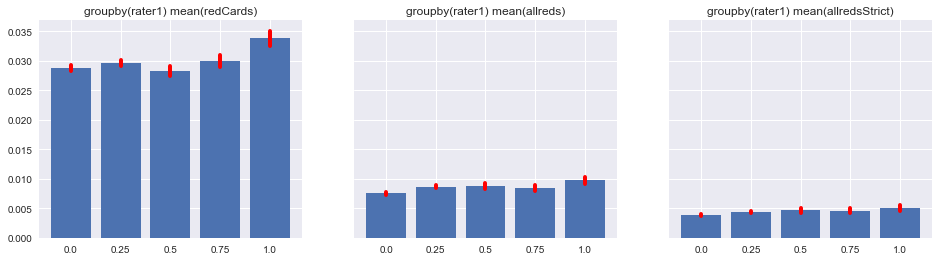

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

data = df_focus.groupby(['rater1']).agg(aggs)

df_col_agg_bar(axes[0], data, 'groupby(rater1)', 'redCards', 'mean')
df_col_agg_bar(axes[1], data, 'groupby(rater1)', 'allreds', 'mean')
df_col_agg_bar(axes[2], data, 'groupby(rater1)', 'allredsStrict', 'mean')

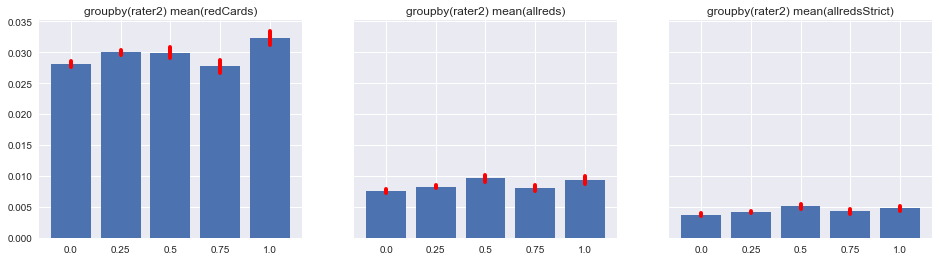

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

data = df_focus.groupby(['rater2']).agg(aggs)

df_col_agg_bar(axes[0], data, 'groupby(rater2)', 'redCards', 'mean')
df_col_agg_bar(axes[1], data, 'groupby(rater2)', 'allreds', 'mean')
df_col_agg_bar(axes[2], data, 'groupby(rater2)', 'allredsStrict', 'mean')

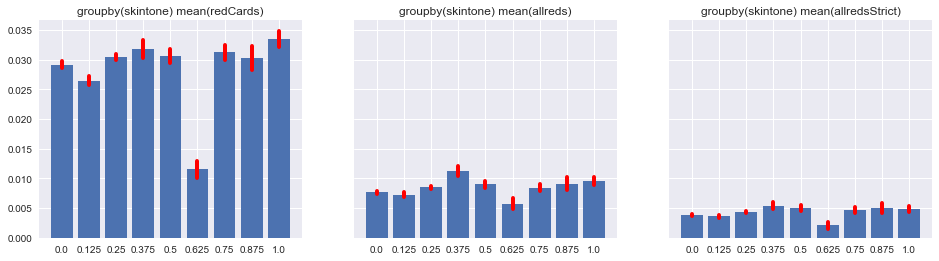

In [34]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

data = df_focus.groupby(['skintone']).agg(aggs)

df_col_agg_bar(axes[0], data, 'groupby(skintone)', 'redCards', 'mean')
df_col_agg_bar(axes[1], data, 'groupby(skintone)', 'allreds', 'mean')
df_col_agg_bar(axes[2], data, 'groupby(skintone)', 'allredsStrict', 'mean')

what is going on there with `0.625` group? 